# Статистика, DS-поток
## Задание SP.4

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  50 баллов
* Задача 2 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средне-высокая:* задача 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Поправил графики и вывод</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [1]:
# Bot check

# HW_ID: ds_sp4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [2]:
def draw_likelihood(density_function, grid, samples, label):
    '''Изображает график функции правдоподобия для каждой из 3 выборок. Аргументы:
        density_function --- функция, считающая плотность (обычную или дискретную). Эта функция 
            должна принимать массив размера (1, len_sample) и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    assert len(samples) == 3, "Число выборок не равно 3."
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

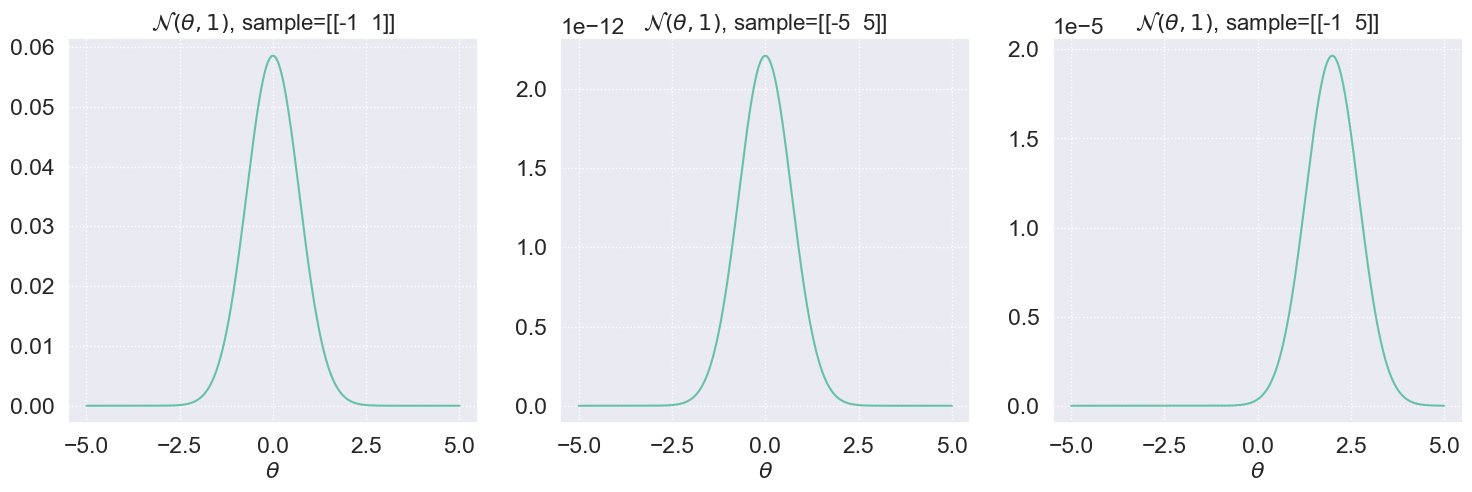

In [3]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

<b><font color="#00b565" size="5">Исправил графики и вывод</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ Неправильно передается параметр равн. распр. Комм. должно быть scale=grid. (-5.0)  
▫️ Неправильно передается параметр эксп. распр. Комм. Должно быть scale=1/grid, а не loc=1/grid, поэтому графики для экспоненциального неправильные. Функция правдоподобия все-таки не может быть отрицательной. (-5.0)  (функция правдоподобия была положительной, так что это опечатка, но scale=1/grid поправил)  
▫️ Обрезан xlim для expon. распределения. (-3.0)  
▫️ На графиках с распределением Pois плохо выбраны xlim. (-5.0)  
▫️ Нет ответа на вопрос является ли функция правдоподобия плотностью или он неправильный. Комм. Ответ: не является. Это функция от theta, а не от x. (-15.0)
</i>

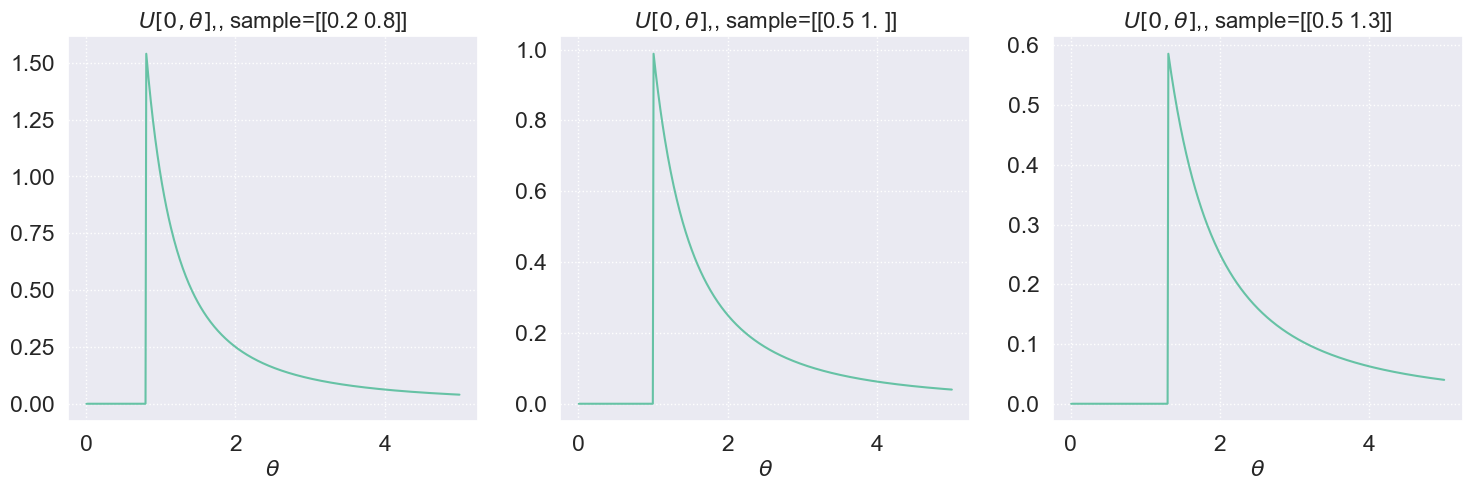

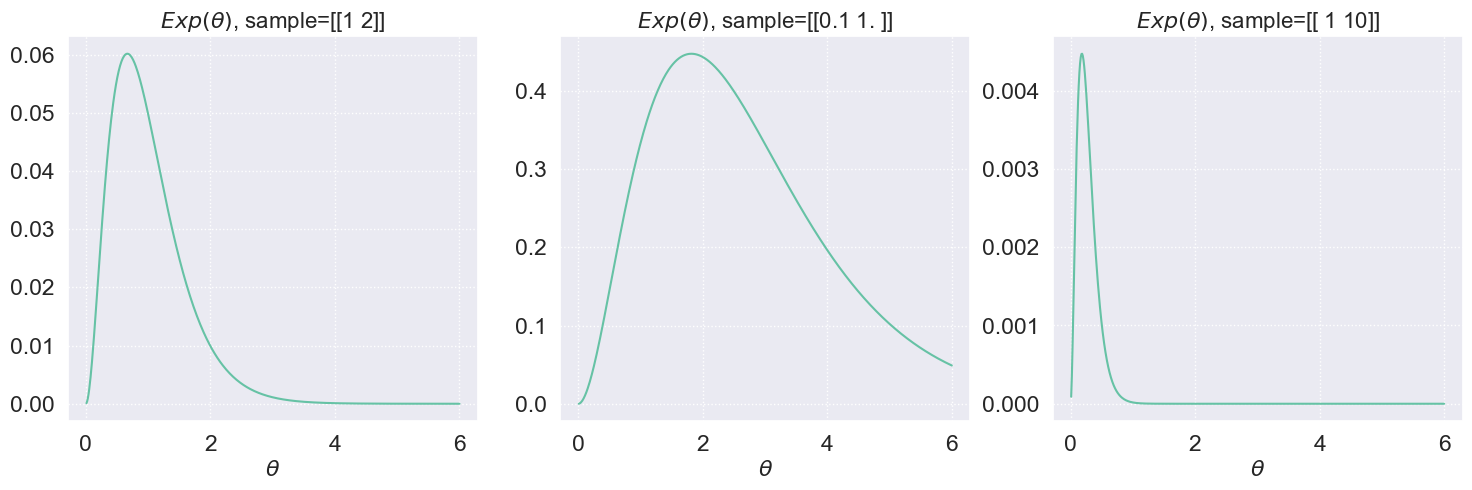

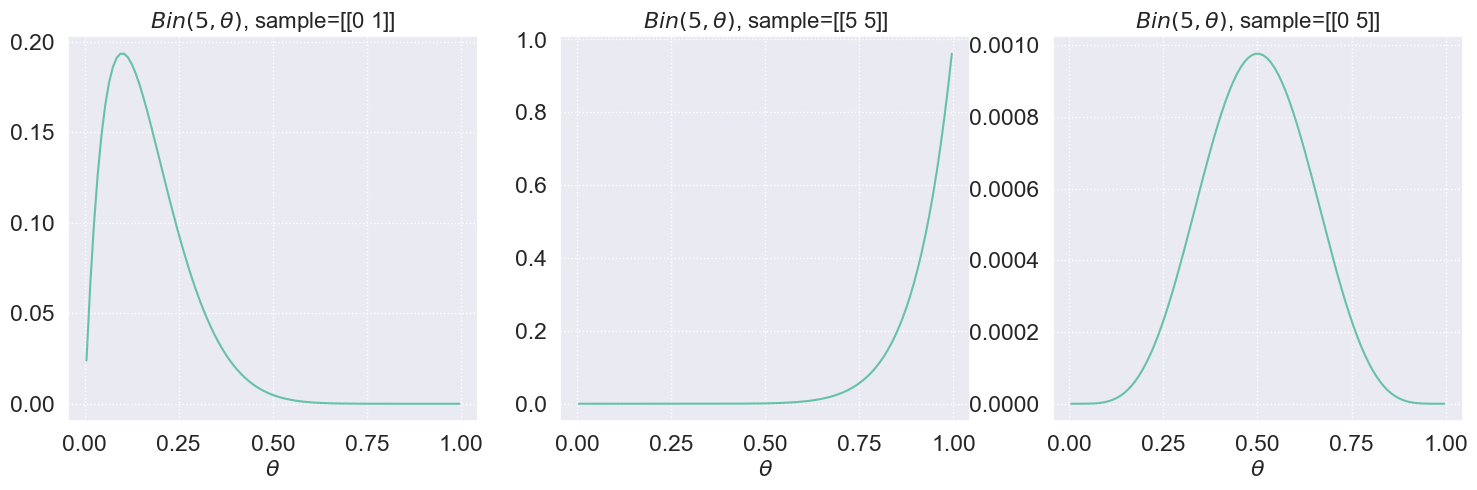

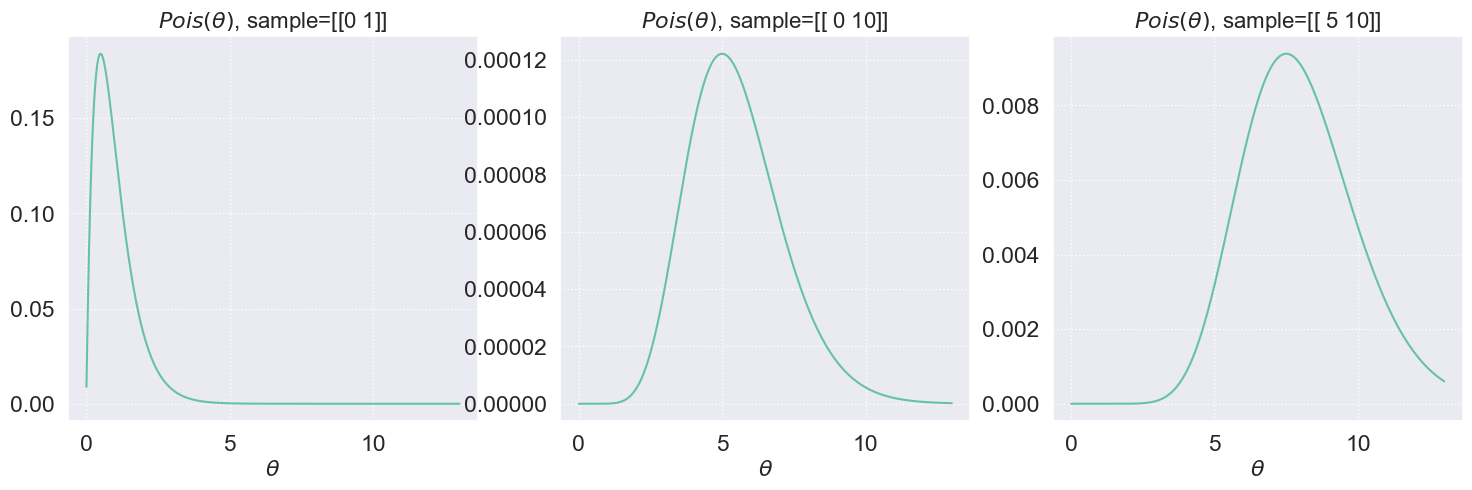

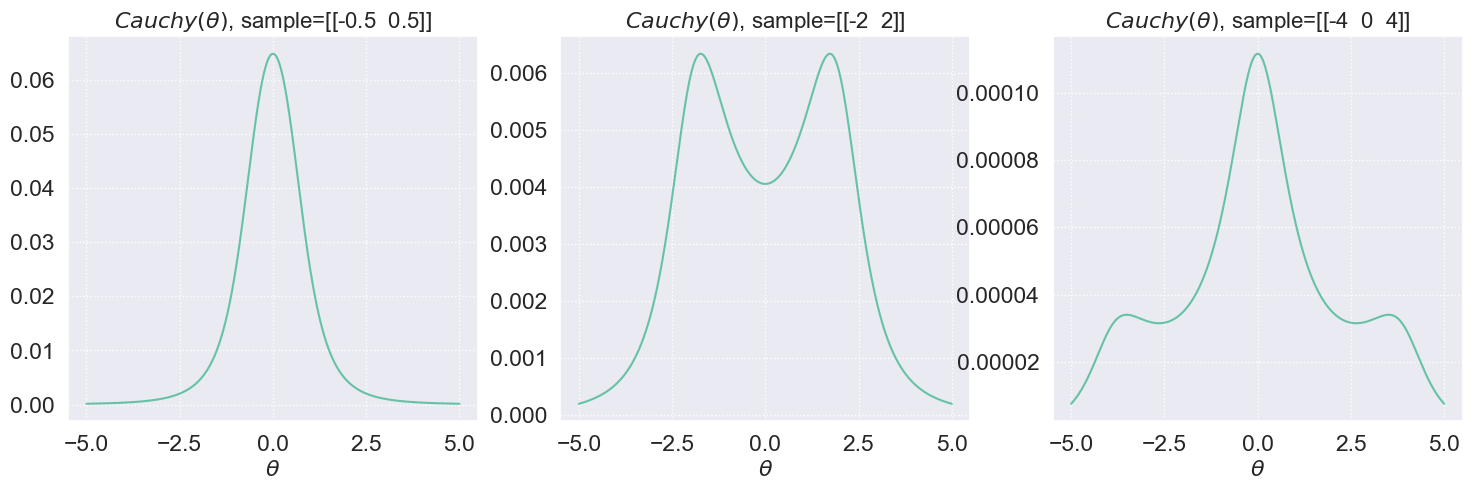

In [9]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$,')
grid = np.linspace(-5, 6, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(5, grid).pmf, grid, [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')
grid = np.linspace(-5, 13, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

***Вывод:***  

*𝑁(𝜃,1): график функции правдоподобия в форме колокола (похож на график плотности 𝑁) и имеет максимум в точке, соответствующей выборочному среднему*    
   
*𝐸𝑥𝑝(𝜃): график функции правдоподобия убывает, при этом горб смещается вправо с увеличением параметра 𝜃 (среднего времени до события)*  
    
*𝑈[0,𝜃]: функция правдоподобия =const на интервале от 0 до 𝜃, и зануляется вне этого интервала*  
    
*𝐵𝑖𝑛(5,𝜃): форма графиков зависит от кол-ва успехов в выборке. Например, при большом числе успехов правдоподобие будет максимальным при 𝜃 близком к 1*  
   
*𝑃𝑜𝑖𝑠(𝜃): с ростом кол-ва событий правдоподобие будет увеличиваться вместе с 𝜃*  
  
*~~Похоже, что во всех случаях функцию правдоподобия можно интерпретировать как ненормированную плотность некоторой случайной величины, т.к. для этого достаточно интегрируемости (конечной площади под графиком \ достаточно быстрого убывания к 0 на бесконечности). Если произвести нормировку (гарантировать площадь под графиком равной 1), то интерпретировать как плотность некоторой случайной величины становится даже проще~~*  

*Функция правдоподобия не является плотностью, т.к. она есть функция от $\theta$, а плотность - функция от x*

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [7]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

*При использовании метода .prod(), вероятности (типа float) перемножаются и значение становится слишком малым (выходит за пределы точности float). Поэтому стоит использовать логарифм функции правдоподобия*  

In [14]:
sample = sps.norm.rvs(size=10**5)
log_likelihood = sps.norm.logpdf(sample).sum()
print(round(log_likelihood,2))  # уже не ноль)

-141762.03


***Вывод**: в рамках задачи удалось ближе познакомитсья с функцией правдоподобия и ее свойствами*

______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов для всей выборки $Y$.
3. Найти ОМП по дискретизованной выборке $Y$, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

*Оценим параметр 𝜃 для обрезанной выборки 3мя способами: омп на подыборке, методом моментов и омп с дискретизацией. Вся необходимая теория выводилась на лекциях и семинарах*  

*Сгенерируем и зафиксируем данные:*  

In [41]:
theta, c, n = 0.15, 10, 1000
X = sps.expon.rvs(scale=1/theta, size=n)
Y = np.minimum(X, c)

*Сравним три подхода при некотором фиксированном n:*  

In [42]:
print(f'1. ОМП на подвыборке:  {round(len(Y[Y < c]) / np.sum(Y[Y < c]), 2)}')
print(f'2. Метод моментов:  {round(1 / np.mean(Y), 2)}')

num_bins = 10  
bins = np.linspace(0, c, num_bins+1)
Z = np.digitize(Y, bins)
probs = np.zeros(num_bins+1)
for i in range(1, num_bins+1):
    if i < num_bins:
        probs[i-1] = np.exp(-theta * bins[i-1]) - np.exp(-theta * bins[i])
    else:
        probs[i-1] = 1 - np.exp(-theta * bins[i-1])
theta_3 = np.sum(Z-1) / (n * np.sum(probs * np.arange(1, num_bins+2)))
print(f'3. ОМП по дискрет. выборке:  {round(theta_3, 2)}')

1. ОМП на подвыборке:  0.27
2. Метод моментов:  0.19
3. ОМП по дискрет. выборке:  0.46


*Все оценки довольно далеки от истинного значения параметра. Максимальная ошибка у ОМП по дискретизированной выборке, а минимальная - у метода моментов (видимо, он лучше подходит для задачи)*   
  
*Теперь посмотрим на зависимость от размера выборки*   

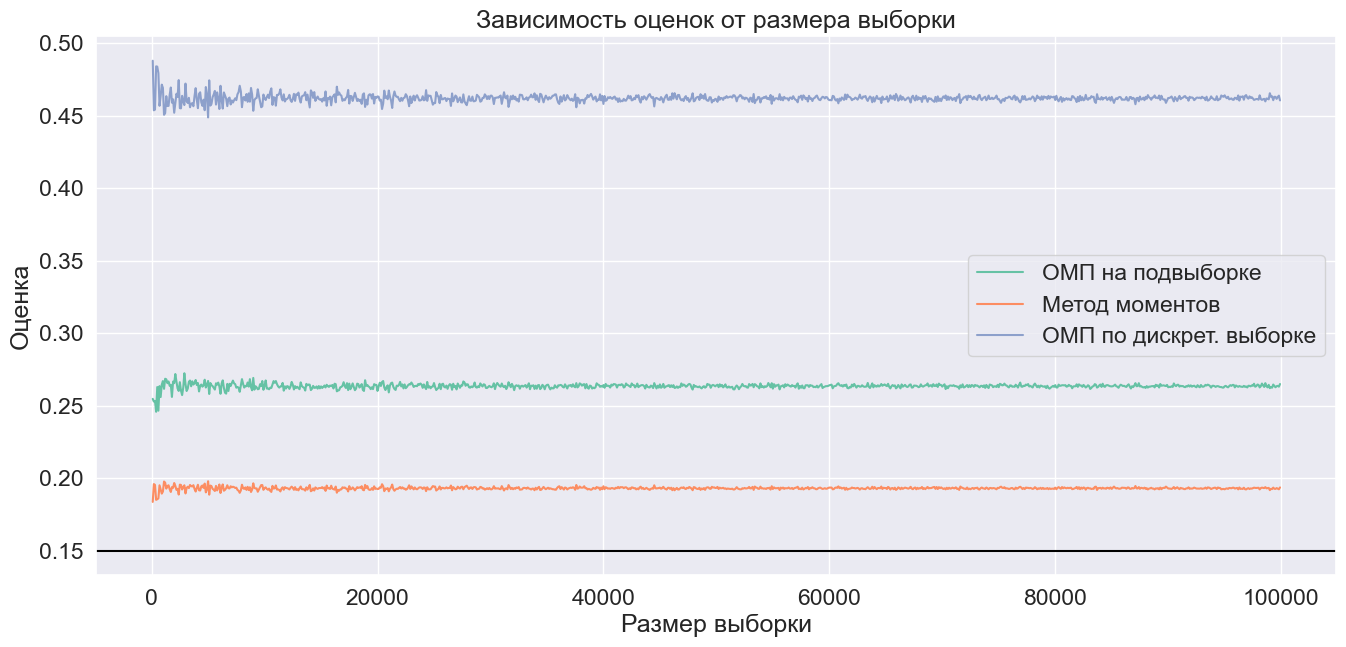

In [43]:
thetas_1, thetas_2, thetas_3 = [], [], []
ns = np.arange(100,100000,100)
for n in ns: 
    X = sps.expon.rvs(scale=1/theta, size=n)
    Y = np.minimum(X, c)
    thetas_1.append(len(Y[Y < c]) / np.sum(Y[Y < c]))
    thetas_2.append(1 / np.mean(Y))

    Z = np.digitize(Y, bins)
    probs = np.zeros(num_bins+1)
    for i in range(1, num_bins+1):
        if i < num_bins:
            probs[i-1] = np.exp(-theta * bins[i-1]) - np.exp(-theta * bins[i])
        else:
            probs[i-1] = 1 - np.exp(-theta * bins[i-1])
    thetas_3.append(np.sum(Z-1) / (n * np.sum(probs * np.arange(1, num_bins+2))))

plt.figure(figsize=(16,7))
for th, label in zip([thetas_1,thetas_2,thetas_3], ['ОМП на подвыборке','Метод моментов','ОМП по дискрет. выборке']):
    sns.lineplot(x=ns, y=th, label=label)
plt.axhline(theta, color='black')
plt.title('Зависимость оценок от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Оценка')
plt.legend()
plt.show()

***Вывод:**  оценки почти не зависят от размера выборки (при малых выборках просто больше разброс), причем оценки довольно далеки от истинного значения параметра. Похоже, метод моментов лучше всего подходит в задаче, но даже на нем ошибка велика*